Collision detected at time 8 seconds


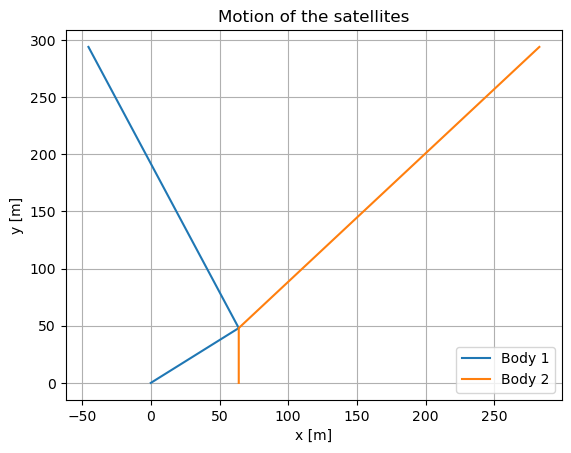

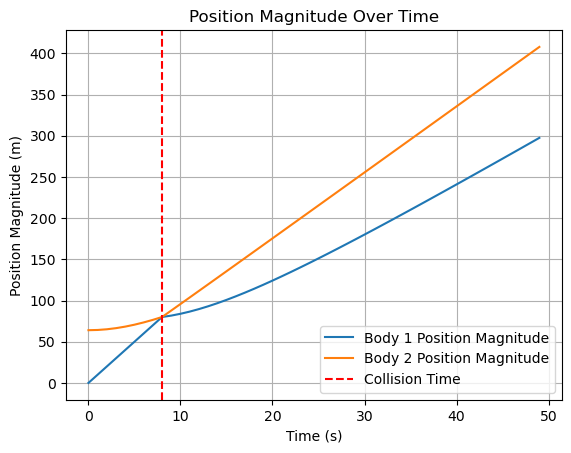

C:\Users\joost\AppData\Local\Temp\ipykernel_3048\1208100505.py:111: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line1.set_data(p1[i, 0], p1[i, 1])
C:\Users\joost\AppData\Local\Temp\ipykernel_3048\1208100505.py:112: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line2.set_data(p2[i, 0], p2[i, 1])


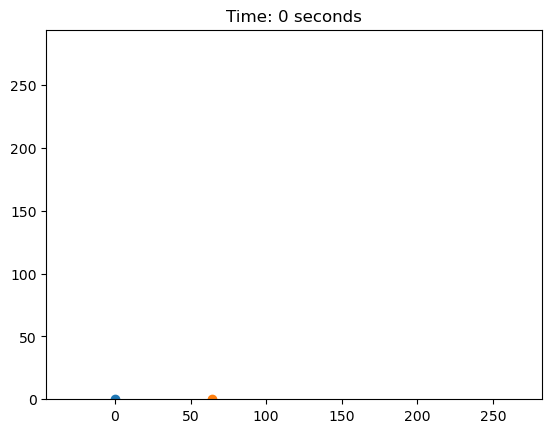

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Velocities
v1_initial = np.array([8.0, 6.0])    # Initial velocity of moving body, m/s (diagonal motion)
v2_initial = np.array([0.0, 6.0])    # Initial velocity of stationary body, m/s (moving along x-axis)

# Positions
p1_initial = np.array([0.0, 0.0])    # Initial position of moving body, m
p2_initial = np.array([64.0, 0.0])  # Initial position of stationary body, m

# Masses
m1 = 1.0  # Mass of the moving body, kg
m2 = 2.0  # Mass of the stationary body, kg

# Time parameters
t_final = 50  # Total simulation time, seconds
dt = 1       # Time step, seconds

# Time array
t = np.arange(0, t_final, dt) #Creates a time array at intervals of dt.

#Position arrays
#This creates the position array for each timestep. 
p1 = np.zeros((len(t), 2))
p2 = np.zeros((len(t), 2))
#This sets the inital positions of the satellites
p1[0] = p1_initial
p2[0] = p2_initial

# Velocity arrays
v1 = np.zeros((len(t), 2))
v2 = np.zeros((len(t), 2))
# Set the initial velocities
v1 = v1_initial
v2 = v2_initial

collision_t = None

#Simulate the motion of the satellites until collison
#This takes the previous position and then adds the change in position based on speed*time

for i in range(1, len(t)):
    p1[i]= p1[i-1] + v1 * dt
    p2[i]= p2[i-1] + v2 * dt

    if np.linalg.norm(p1[i] - p2[i]) < 1e-2:
        collision_t = i
        break

if collision_t is not None:
    print(f"Collision detected at time {collision_t} seconds")
    #When collision occurs, momentum exchange must be determined.
    #The momentum exchange is determined by the conservation of momentum.

    v1_final = (v1 * (m1 - m2) + 2 * m2 * v2) / (m1 + m2)
    v2_final = (v2 * (m2 - m1) + 2 * m1 * v1) / (m1 + m2)

    #update with the new velocities
    v1 = v1_final
    v2 = v2_final

    #Simulate the motion of the satellites after collision
    #This takes the previous position and then adds the change in position based on speed*time

    for i in range(collision_t+1, len(t)):
        p1[i]= p1[i-1] + v1* dt
        p2[i]= p2[i-1] + v2* dt
else:
    print("No collision detected")

#plot positions 
plt.figure()
plt.plot(p1[:, 0], p1[:, 1], label='Body 1')
plt.plot(p2[:, 0], p2[:, 1], label='Body 2')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.legend()
plt.title('Motion of the satellites')
plt.grid(True)
plt.show()

# Plotting the velocities before and after collision
if collision_t:
    plt.figure()
    plt.plot(t, np.linalg.norm(p1, axis=1), label='Body 1 Position Magnitude')
    plt.plot(t, np.linalg.norm(p2, axis=1), label='Body 2 Position Magnitude')
    plt.axvline(collision_t, color='r', linestyle='--', label='Collision Time')
    plt.xlabel('Time (s)')
    plt.ylabel('Position Magnitude (m)')
    plt.title('Position Magnitude Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()



#ANIMATION
# Create a figure and axes
fig, ax = plt.subplots()
# Plot the initial positions of the bodies
line1, = ax.plot(p1[0, 0], p1[0, 1], 'o')
line2, = ax.plot(p2[0, 0], p2[0, 1], 'o')
# Set the axes limits
ax.set_xlim(min(p1[:, 0].min(), p2[:, 0].min()), max(p1[:, 0].max(), p2[:, 0].max()))
ax.set_ylim(min(p1[:, 1].min(), p2[:, 1].min()), max(p1[:, 1].max(), p2[:, 1].max()))
# Define the update function
def update(i):
    line1.set_data(p1[i, 0], p1[i, 1])
    line2.set_data(p2[i, 0], p2[i, 1])
    ax.set_title(f"Time: {i*dt} seconds")
# Create the animation
ani = FuncAnimation(fig, update, frames=len(t), repeat=False)
# Convert the animation to HTML and display it
HTML(ani.to_jshtml())